In [1]:
import csv
import random
import math
import operator

def loadDataset(filename, split, trainingSet=[] , testSet=[]):
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset)-1):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])

In [2]:
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

In [3]:
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [4]:
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [18]:
def main():
    global acc_array, kval, splitval
    kval = [3, 5, 9, 13, 17]
    splitval = [0.3, 0.5, 0.7, 0.9]
    acc_array = {}
    for split in splitval:
        arr = {}
        trainingSet=[]
        testSet=[]
        loadDataset('iris.csv', split, trainingSet, testSet)
        print('Train set: ' + repr(len(trainingSet)))
        print('Test set: ' + repr(len(testSet)))
        for k in kval:
            # generate predictions
            predictions=[]
            for x in range(len(testSet)):
                neighbors = getNeighbors(trainingSet, testSet[x], k)
                result = getResponse(neighbors)
                predictions.append(result)
#                 print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
            accuracy = getAccuracy(testSet, predictions)
            print('Split - ' + str(split) + ' - K - ' + str(k))
            print('Accuracy: ' + repr(accuracy) + '%')
            arr[k] = accuracy
        acc_array[split] = arr
    
main()
print(acc_array)

Train set: 43
Test set: 106
Split - 0.3 - K - 3
Accuracy: 96.22641509433963%
Split - 0.3 - K - 5
Accuracy: 96.22641509433963%
Split - 0.3 - K - 9
Accuracy: 97.16981132075472%
Split - 0.3 - K - 13
Accuracy: 94.33962264150944%
Split - 0.3 - K - 17
Accuracy: 93.39622641509435%
Train set: 79
Test set: 70
Split - 0.5 - K - 3
Accuracy: 97.14285714285714%
Split - 0.5 - K - 5
Accuracy: 97.14285714285714%
Split - 0.5 - K - 9
Accuracy: 98.57142857142858%
Split - 0.5 - K - 13
Accuracy: 97.14285714285714%
Split - 0.5 - K - 17
Accuracy: 95.71428571428572%
Train set: 114
Test set: 35
Split - 0.7 - K - 3
Accuracy: 97.14285714285714%
Split - 0.7 - K - 5
Accuracy: 97.14285714285714%
Split - 0.7 - K - 9
Accuracy: 97.14285714285714%
Split - 0.7 - K - 13
Accuracy: 97.14285714285714%
Split - 0.7 - K - 17
Accuracy: 97.14285714285714%
Train set: 135
Test set: 14
Split - 0.9 - K - 3
Accuracy: 92.85714285714286%
Split - 0.9 - K - 5
Accuracy: 92.85714285714286%
Split - 0.9 - K - 9
Accuracy: 100.0%
Split - 0.9 -

In [47]:
import pandas as pd
accuracy_df = pd.DataFrame(acc_array)
accuracy_df.index.name = 'KValues'
accuracy_df = pd.DataFrame(accuracy_df).rename_axis('Split Values', axis=1)

In [48]:
accuracy_df

Split Values,0.3,0.5,0.7,0.9
KValues,,,,
3,96.226415,97.142857,97.142857,92.857143
5,96.226415,97.142857,97.142857,92.857143
9,97.169811,98.571429,97.142857,100.000000
13,94.339623,97.142857,97.142857,100.000000
17,93.396226,95.714286,97.142857,92.857143


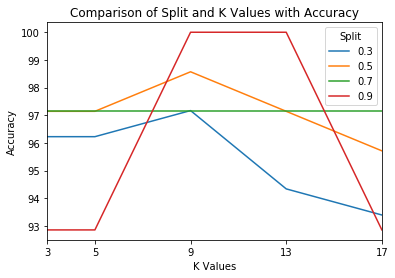

In [21]:
import matplotlib.pyplot as plt
ax = accuracy_df.plot()
ax.set_xticks(accuracy_df.index)
plt.xlabel("K Values")
plt.ylabel("Accuracy")
plt.title("Comparison of Split and K Values with Accuracy")
plt.legend(title="Split")
plt.show()


In [22]:
def cross_val(filename, folds, dataset):
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset)-1):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])

In [23]:
import numpy as np
import itertools

def fold_n(dataset, i, k):
    n = len(dataset)
    test_set = dataset[n*(i-1)//k:n*i//k]
    return test_set

with open('iris.csv', 'r') as csvfile:
    lines = csv.reader(csvfile)
    folds = 5
    dataset = list(lines)
    n = len(dataset)
    train_arr = []
    test_arr = []
    for i in range(folds):
        test = fold_n(dataset,i+1,folds)
        test_arr.append(test)

In [24]:
train_set = []
finally_train = []
for l in range(5):
    train = [n for i,n in enumerate(test_arr) if i!=l]
    finally_train.append(list(itertools.chain.from_iterable(train)))

In [25]:
from statistics import mean
pred_final = []
cross_sek_acc = {}
kVals = [3, 5, 9, 13, 17]
for k in kVals:
    acc = []
    for s in range(5):
        pred = []
        train = finally_train[s]
        test = test_arr[s]
        for t in train:
            t[0] = float(t[0])
            t[1] = float(t[1])
            t[2] = float(t[2])
            t[3] = float(t[3])
        for t in test:
            t[0] = float(t[0])
            t[1] = float(t[1])
            t[2] = float(t[2])
            t[3] = float(t[3]) 
        for x in range(len(test)):
            neighbors = getNeighbors(train, test[x], k)
            result = getResponse(neighbors)
            pred.append(result)
        accuracy = getAccuracy(test, pred)
        acc.append(accuracy)
    cross_sek_acc[k] = mean(acc)

In [26]:
cross_sek_acc

{3: 90.66666666666667,
 5: 91.33333333333333,
 9: 92.0,
 13: 90.66666666666667,
 17: 87.33333333333333}

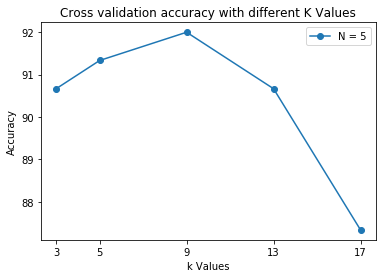

In [27]:
kNN_kval = [3, 5, 9, 13, 17]
lists = sorted(cross_sek_acc.items())
x, y = zip(*lists)

plt.plot(x, y, label="N = 5", marker="o")
plt.xlabel("k Values")
plt.ylabel("Accuracy")
plt.title("Cross validation accuracy with different K Values")
plt.legend()
plt.xticks(kNN_kval)
plt.show()

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [29]:
df_iris = pd.read_csv('iris.csv', header=None)

In [30]:
y = df_iris.iloc[:,-1]
X = df_iris.iloc[:,:-1]


In [31]:
cross_acc_dict = {}
for kVal in kNN_kval:
    kNN = KNeighborsClassifier(n_neighbors=kVal)
    scores = cross_val_score(kNN, X, y, cv=5)
    cross_acc_dict[kVal] = scores.mean()

In [32]:
cross_acc_dict

{3: 0.9666666666666668,
 5: 0.9733333333333334,
 9: 0.9733333333333334,
 13: 0.9733333333333334,
 17: 0.9666666666666668}

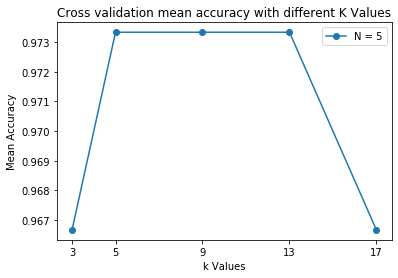

In [33]:
lists = sorted(cross_acc_dict.items())
x, y = zip(*lists)

plt.plot(x, y, label="N = 5", marker="o")
plt.xlabel("k Values")
plt.ylabel("Mean Accuracy")
plt.title("Cross validation mean accuracy with different K Values")
plt.legend()
plt.xticks(kNN_kval)
plt.show()